In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

: 

In [2]:
data = pd.read_csv('./Subsets/Maintenance_Text_data.csv',encoding='latin-1')

In [3]:
data['remark'].iat[0]

'TAILWHEEL COCKED RIGHT PRIOR TO takeoff '

Data has 2748 rows and 35 cols
0 columns are completely empty
33 columns are completely full


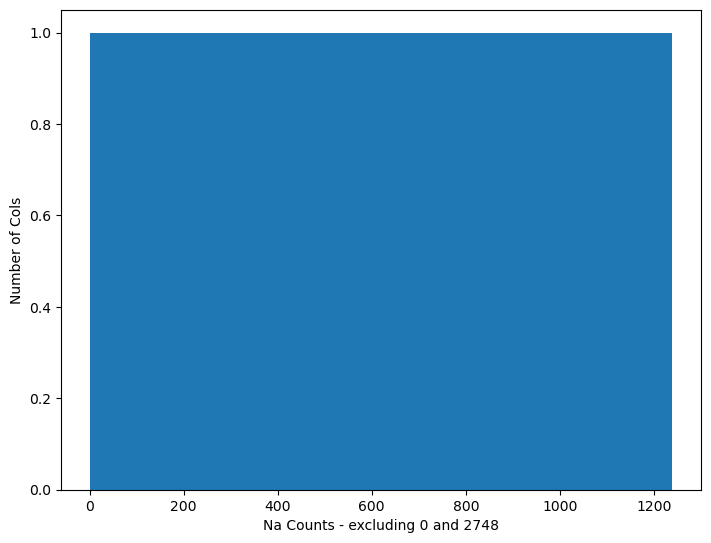

In [4]:
# general / column fullness

Nrows = len(data)
Ncols = len(data.columns)

nonemptycols = data.dropna(axis='columns',how='all')
fullcols = data.dropna(axis='columns')
mixedcols = nonemptycols.drop(columns=list(fullcols.columns))
na_counts = [mixedcols[col].isna().sum() for col in mixedcols]

# output

print(f'Data has {Nrows} rows and {Ncols} cols')
print(f'{Ncols - len(nonemptycols.columns)} columns are completely empty')
print(f"{len(data.dropna(axis='columns').columns)} columns are completely full")

# histogram of na vals
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
na_hist = ax.hist(na_counts, len(na_counts))
ylabel=ax.set_ylabel('Number of Cols')
xlabel=ax.set_xlabel(f'Na Counts - excluding 0 and {Nrows}')

-------
c101                          : ['Personal            ', 'Air Taxi (Non-Schedu', 'Instruction         ', 'Business            ', 'Scheduled Air Carrie', 'Other               ']
full series has 15 unique vals: ['Personal            ', 'Air Taxi (Non-Schedu', 'Instruction         ', 'Business            ', 'Scheduled Air Carrie', 'Other               ', 'Aerial Applicator   ', 'A/T Com (Sched 5/Mor', 'Executive           ', 'Industrial/Special  ', 'Supplemental Or Comm', 'All Cargo Carriers  ', 'Air Taxi (Sched-Not ', 'For Hire            ', 'Air Taxi Oper-Large ']

-------
c103                          : ['Pleasure            ', 'Passengers          ', 'None Or Other       ', 'Training            ', 'Ferry               ', 'Cargo               ']
full series has 26 unique vals: ['Pleasure            ', 'Passengers          ', 'None Or Other       ', 'Training            ', 'Ferry               ', 'Cargo               ', 'Agriculture         ', 'Test Flight         ', 'Glider    

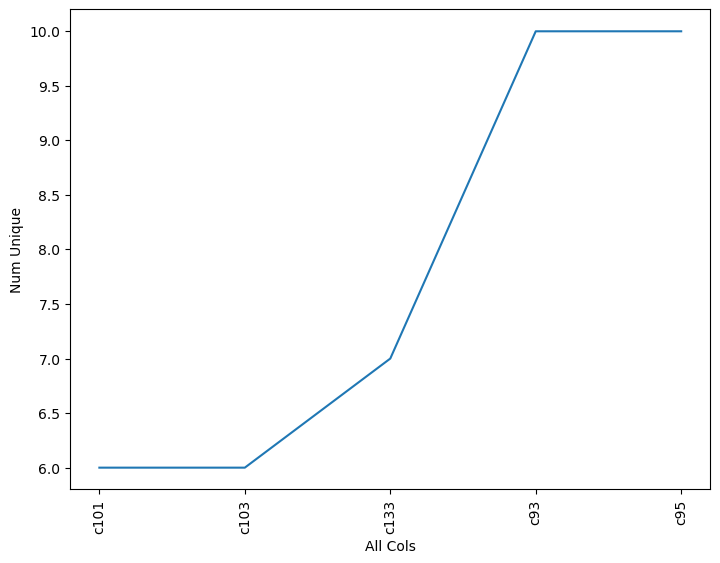

In [5]:
# Unique values in each column

output = True

columns = data.columns
unique_counts = {col : data[col].value_counts() for col in columns}
# value_counts ignores na

# limit columns to ones with unique vals between limits (inclusive), only counting unique vals with at least min instances
limits = (5,15)
min = 100
u_cts_above_min = {col : unique_counts[col].drop([label for label in unique_counts[col].index if unique_counts[col][label] < min]).dropna() for col in columns}
columns = [col for col in columns if len(u_cts_above_min[col]) >= limits[0] and len(u_cts_above_min[col]) <= limits[1]]

# sort for graph
columns = sorted(columns, key=lambda col : len(u_cts_above_min[col]))

# output

if output:

    for col in columns:
        print('-------')
        print(f'{col:<30}: {[index for index in u_cts_above_min[col].index]}')
        print(f'full series has {len(unique_counts[col])} unique vals: {[index for index in unique_counts[col].index]}')
        print()

    # graph
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    u_cts = ax.plot(columns, [len(u_cts_above_min[col]) for col in columns])
    plt.xticks(rotation=90)
    ylabel = ax.set_ylabel('Num Unique')
    xlabel = ax.set_xlabel('All Cols')

In [6]:
# Check Text Column Viability for NLP

# identified these columns as text columns just by looking through the csv
columns = ['c119','remark','c85','c95']
Nrows = len(data)

# check for number of na's in text cols
percent_full = {col : data[col].notna().sum()/Nrows*100 for col in columns}

# check for number of words in entries in text cols
word_counts = {}
for col in columns:
    full_data = data[col].dropna()
    word_counts[col] = np.asarray([len( full_data.iat[row].split() ) for row in range(len(full_data))])

# output

print('Fullness of Text Cols:')
for col in columns:
    print(f'{col:>20} : {percent_full[col]:.4}%')

print('')

print('Number of Words in Entries:')
for col in columns:
    print(f'{col:>20} : Average: {word_counts[col].mean():.3}, std={word_counts[col].std():.4}')

Fullness of Text Cols:
                c119 : 100.0%
              remark : 100.0%
                 c85 : 54.91%
                 c95 : 99.93%

Number of Words in Entries:
                c119 : Average: 17.0, std=3.038
              remark : Average: 55.0, std=95.42
                 c85 : Average: 2.47, std=1.286
                 c95 : Average: 2.9, std=1.159


In [7]:
# Checking Frequency of Unique Values in Specified Column (viability for use as category)

ycol = 'c78'

# get unique values with number of instances above min
min = 100
u_cts = data[ycol].value_counts() # series not dictionary of series, bc it's just the one col
r_u_cts = u_cts.drop([label for label in u_cts.index if u_cts[label] < min])
y_set = r_u_cts.index
print(f'Instances of Unique Values in {ycol}:')
print(f'{len(y_set)} values with more than {min} instances')
print(u_cts)
print()

Instances of Unique Values in c78:
3 values with more than 100 instances
II    1942
ME     374
AU     244
AF      92
DE      57
EQ      23
AI      15
AP       1
Name: c78, dtype: int64



In [8]:
# comparing location to equipmentNomenclature

# leads me to believe that COUNTERMEASURE E and ENCLOSURE, CONT have something that differentiates them but still
# may both be short for countermeasure enclosure

In [9]:
import sys
sys.path.insert(0, path_to_user + 'modules')
import data_lib

NameError: name 'path_to_user' is not defined

In [10]:
locs = {label:data_lib.select_data(data, 'location','equipmentNomenclature',[label])['location'] for label in ['CABINET, ELECTRI','CONSOLE, DISPLAY','ENCLOSURE, COUNT','EXCHANGER, HEAT,','AN/SLQ-32','COUNTERMEASURES','COUNTERMEASURE E']}

NameError: name 'data_lib' is not defined

In [13]:
loc_counts = {}
for label in ['CABINET, ELECTRI','CONSOLE, DISPLAY','ENCLOSURE, COUNT','EXCHANGER, HEAT,','AN/SLQ-32','COUNTERMEASURES','COUNTERMEASURE E']:
    loc_counts[label] = {}
    for entry in locs[label]:
        loc_counts[label][entry] = loc_counts[label].get(entry, 0) + 1

In [14]:
loc_counts

{'CABINET, ELECTRI': {'03-128-0-C': 643},
 'CONSOLE, DISPLAY': {'1-126-0-C': 140, '03-142-1-Q': 142, '2-126-2-C': 40},
 'ENCLOSURE, COUNT': {'03-142-5-X': 182, '03-142-6-X': 89},
 'EXCHANGER, HEAT,': {'03-128-0-C': 237, 'MULTIPLE': 1},
 'AN/SLQ-32': {'MULTIPLE': 176, 'SHIPWIDE': 29, nan: 2},
 'COUNTERMEASURES': {'MULTIPLE': 126, 'SHIPWIDE': 29},
 'COUNTERMEASURE E': {'03-142-6-X': 133}}

In [22]:
# THIS DIDN'T TURN UP ANYTHING AND IT TOOK FOREVER TO RUN
# I was trying to see if there were columns where if there was one thing in a certain column there was often another thing in a different column

# check for column correspondence by finding rows where the entries in two columns are the same
def check(pair, data, counts) :
    
    # pair is the names of the two columns we're checkinf for 'correspondence'
    
    corr_rows = {}
    
    # find corresponding ones
    for index in data[[pair[0],pair[1]]].dropna().index: 
        
        # key is the entries in both columns at a particular row, concatenated together with a '__' in between
        key = str(data[pair[0]].iat[index]) + "__" + str(data[pair[1]].iat[index])
        
        # adds row to corr_rows under that key
        if key in corr_rows:
            corr_rows[key].append(index)
        else :
            corr_rows[key] = [index]
    
    # check against counts so that we don't count values that show up frequently in both columns anyway
    del_keys = []
    for key in corr_rows:
        
        vals = key.split('__')
        
        prob_freq = counts[pair[0]][vals[0]] * counts[pair[1]][vals[1]] * len(data)
        
        if (len(corr_rows[key]) < prob_freq*1.1) :
            del_keys.append(key)
    
    for key in del_keys:
        corr_rows.pop(key)
    
    return corr_rows

###################################################

from itertools import combinations

# every single combination of columns, yikes
pairs = [combo for combo in combinations(data.columns, 2)]

import concurrent.futures

corr_cols = {}

# count how many times each value occurs in the column
counts = {}
for col in data.columns:
    counts[col] = {}
    for cell in data[col].dropna():
        counts[col][str(cell)] = counts[col].get(str(cell), 0) + 1

with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    future_to_pair = {executor.submit(check, pair, data, counts) : pair for pair in pairs}
    for future in concurrent.futures.as_completed(future_to_pair):
        corr_rows = future.result()
        if len(corr_rows) > 0:
            pair = future_to_pair[future]
            pair_name = pair[0] + "__" + pair[1]
            corr_cols[pair_name] = str(len(corr_rows))
            print(f'{pair_name} : {corr_cols[pair_name]}')

KeyboardInterrupt: 